## I. DISLCAIMER

- I will write the explanation of the code in advance, then the code in the next session respectively.
- This project is a task given by Kita Lulus as a qualification test for a role as Data Analyst.
- The limitations of this projects only to answer the question asked in the PDF file.
- All the codings, visualization and explation should answer the question in PDF file, however to make to easier the question and asnwer will be compiled in the last session.

______

## 1. IMPORT LIBRARY

1.1 Import Libraries
- Hereby I import all the libraries that will be used in this project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


import warnings
warnings.filterwarnings("ignore")

__________

## 2. DATA LOADING

2.1 Data Loading
- Loading the csv dataset that will be processed for getting the insight in this project.
- Also showing the first five of the data.

In [2]:
df = pd.read_csv('customer_bank_data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


2.2 Showing the last 5 of the data.

In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


2.3 Checking Data

___________

## 3. DATA CLEANING

3.1 Data Shape
- There is 11,162 rows and 17 colums in our dataset.
- We also could see the type of the column data in our dataset.
- It seems the datasets consist of 7 numerical columns, and 10 categorical columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


3.2 Missing values
- There is no missing values in our dataset.

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

3.3 Duplicated values
- There is no duplicated values in the dataset.

In [6]:
df.duplicated().sum()

0

3.4 Descriptive Statistic
- There are some strange values in our data; balance and pdays columns have minus values.
- Since balance indicates average yearly balance, in euros it can't be below zero unless they have debt.
- Also in p-days, -1 means it's previously not contacted so we can change it to 0 instead.
- In below descriptive statistic we can guess there may be outliers in some columns since the std is huge compared to respective mean and max values.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


3.5 Cleaning balance column
- The value below 0, replaced to 0 then assign it to new columns.
- The minimum value for new balance column that has been cleaned is 0.
- The minimum value for the oiginal balance column is -6847.

In [8]:
new_balance = np.where(df['balance'] < 0, 0, df['balance'])
df.insert(5, 'new_balance', new_balance, True)
print('The minimal values in new_balance column is', np.min(df['new_balance']))
print('The minimal values in balance column is', np.min(df['balance']))
df.head()

The minimal values in new_balance column is 0
The minimal values in balance column is -6847


,age,job,marital,education,default,new_balance,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


3.6 Plotting the data distribution of balance column
- There distribution of the data might not significantly change, but we can see in histogram that there is no data below 0 in new balance column.
- In boxplot we could see there is no outliers below 0 in new balance column, although there are still some outliers more than 0. 

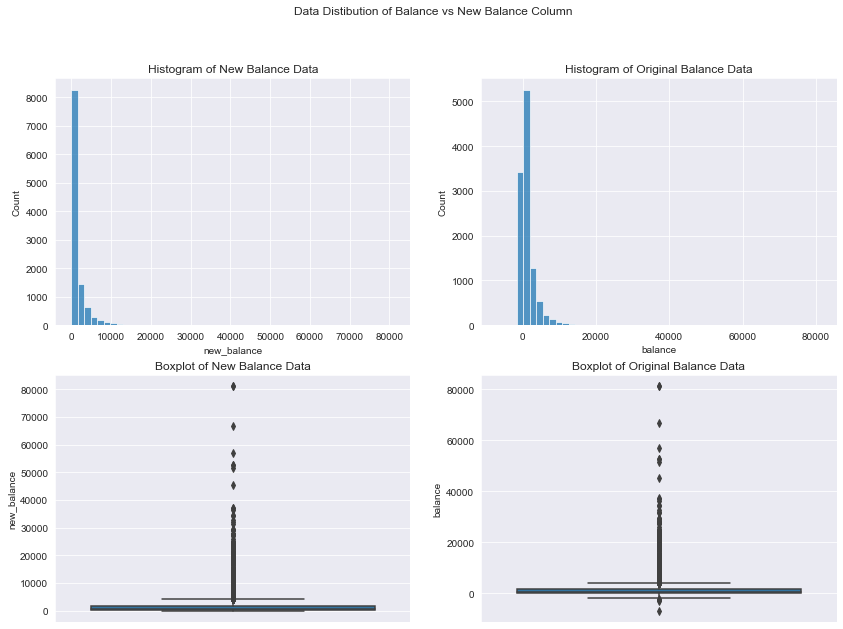

In [9]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df, x='new_balance', ax=ax[0,0], bins=50)
sns.histplot(data=df, x='balance', ax=ax[0,1], bins=50)
sns.boxplot(data=df, y='new_balance', ax=ax[1,0])
sns.boxplot(data=df, y='balance', ax=ax[1,1])
plt.suptitle('Data Distibution of Balance vs New Balance Column')
ax[0,0].title.set_text('Histogram of New Balance Data')
ax[0,1].title.set_text('Histogram of Original Balance Data')
ax[1,0].title.set_text('Boxplot of New Balance Data')
ax[1,1].title.set_text('Boxplot of Original Balance Data')
plt.show()

3.7 Cleaning pdays
- The value below 0 including -1 are replaced to 0.
- Now in the new pdays the minimum value is 0.

In [10]:
new_pdays = np.where(df['pdays'] < 0, 0, df['pdays'])
df.insert(14, 'new_pdays', new_pdays, True)
print('The minimal values in new_pdays column is', np.min(df['new_pdays']))
print('The minimal values in pdays column is', np.min(df['pdays']))
df.head()

The minimal values in new_pdays column is 0
The minimal values in pdays column is -1


,age,job,marital,education,default,new_balance,balance,housing,loan,contact,day,month,duration,campaign,new_pdays,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,2343,yes,no,unknown,5,may,1042,1,0,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,45,no,no,unknown,5,may,1467,1,0,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,1270,yes,no,unknown,5,may,1389,1,0,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,2476,yes,no,unknown,5,may,579,1,0,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,184,no,no,unknown,5,may,673,2,0,-1,0,unknown,yes


3.8 Dropping unnecessary columns
- Dropping the balance and pdays original columns since the new ones will be used later.

In [11]:
df.drop(columns=['balance', 'pdays'], axis=1, inplace=True)

______

## 4. Exploratory Data Analysis

4.1 Values on Categorical variables
- We could see the values in respective categorical columns as show below

In [12]:
print('- job unique variables :', df['job'].unique())
print('='*110)
print('- marital unique variables :', df['marital'].unique())
print('='*110)
print('- education unique variables :', df['education'].unique())
print('='*110)
print('- default unique variables :', df['default'].unique())
print('='*110)
print('- housing unique variables :', df['housing'].unique())
print('='*110)
print('- loan unique variables :', df['loan'].unique())
print('='*110)
print('- contact unique variables :', df['contact'].unique())
print('='*110)
print('- month unique variables :', df['month'].unique())
print('='*110)
print('- poutcome unique variables :', df['poutcome'].unique())
print('='*110)
print('- deposit unique variables :', df['deposit'].unique())

- job unique variables : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
- marital unique variables : ['married' 'single' 'divorced']
- education unique variables : ['secondary' 'tertiary' 'primary' 'unknown']
- default unique variables : ['no' 'yes']
- housing unique variables : ['yes' 'no']
- loan unique variables : ['no' 'yes']
- contact unique variables : ['unknown' 'cellular' 'telephone']
- month unique variables : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
- poutcome unique variables : ['unknown' 'other' 'failure' 'success']
- deposit unique variables : ['yes' 'no']


4.2 Checking Numerical Columns
- It seems that almost all the numerical columns are not Gaussian / Normal distribution. Only days is near to Gaussian distribution, and the only column that doesn't have outliers.

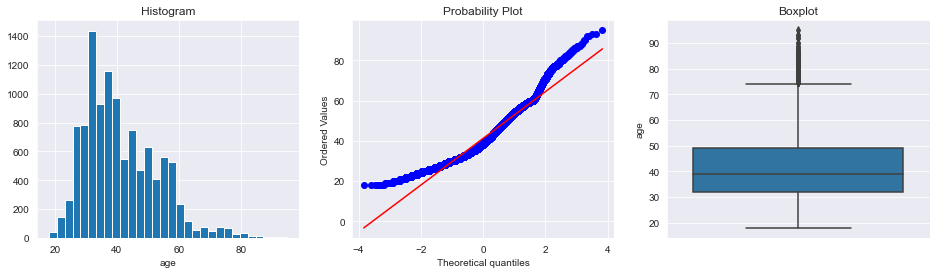

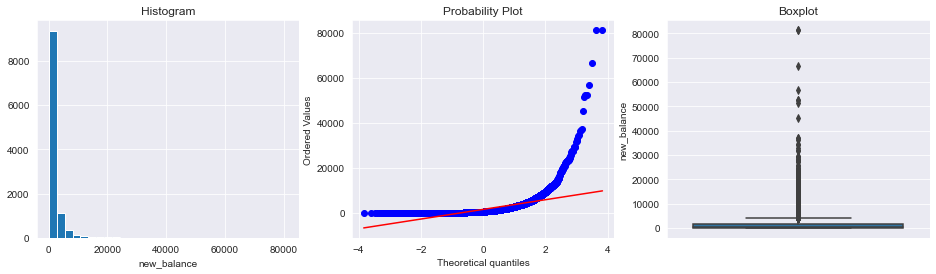

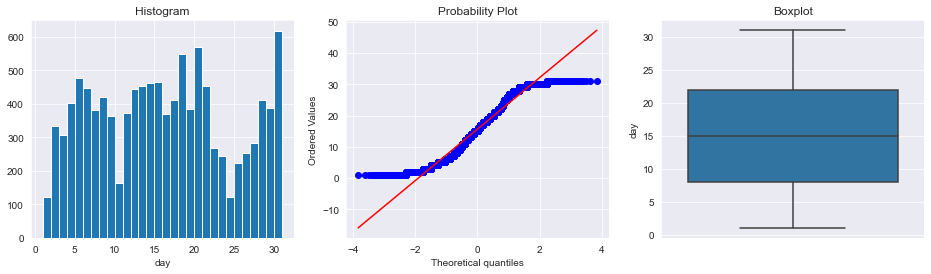

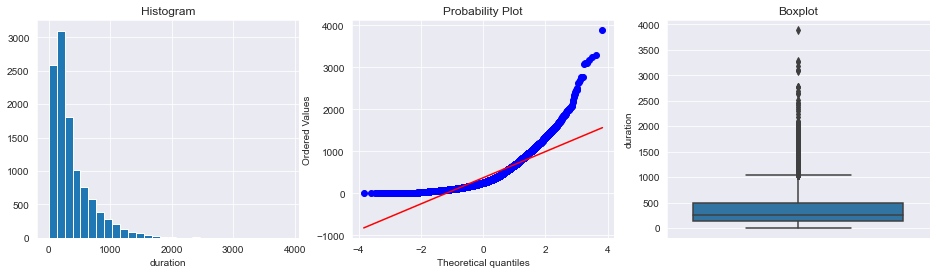

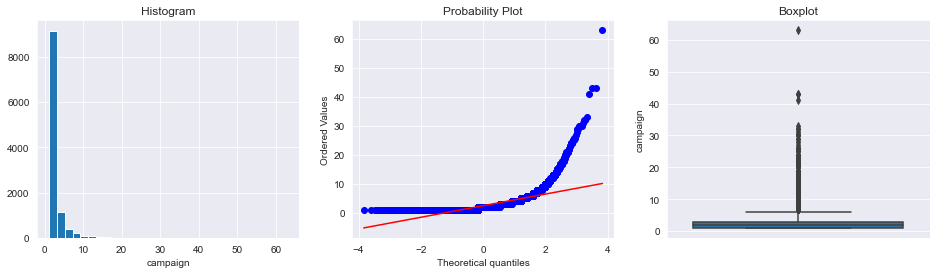

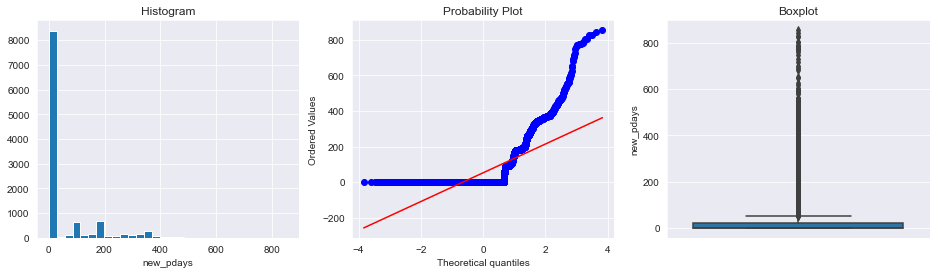

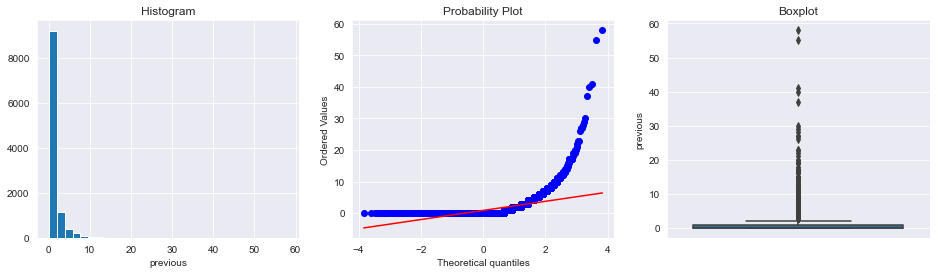

In [13]:
def plot_nums(df, column):
    """Function to visualize histogram, q-q plot and box plot for numerical variables"""
    plt.figure(figsize=(16,4))
    
    plt.subplot(1, 3, 1)
    df[column].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(column)
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[column], plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')
    
    plt.show()


categorical_columns = [column for column in df.columns if column != 'deposit' and df[column].dtype=='O']
numerical_columns = [column for column in df.columns if column != 'deposit' and column not in categorical_columns]

for column in numerical_columns:
    plot_nums(df, column)

4.3 Handling Outliers
- To handle outliers I use the princile of Tukey's Rule for outliers, by capping all the outliers and replace them with either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.
- To do that, I use Winsorizer from feature engine.
- As we can see below that, the maximum amount for respective columns are changed. Yet, if we see the plot there are still outlier value in the columns.
- We can leave it as it is, since if we replace all the outliers, the data will be not accurate to the factual ones.

In [14]:
num_columns = df[['age', 'new_balance', 'day', 'duration', 'campaign', 'new_pdays', 'previous']]

capper_winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['new_balance', 'day', 'duration', 'campaign', 'new_pdays', 'previous'])
capper_winsor.fit(num_columns)
number_handled_outliers = capper_winsor.transform(num_columns)

In [15]:
df.describe()

,age,new_balance,day,duration,campaign,new_pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1548.497223,15.658036,371.993818,2.508421,52.076151,0.832557
std,11.913369,3213.199942,8.420740,347.128386,2.722077,108.399706,2.292007
min,18.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
number_handled_outliers.describe()

,age,new_balance,day,duration,campaign,new_pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1136.785522,15.658036,352.948486,2.238577,12.954376,0.485397
std,11.913369,1328.504138,8.420740,284.714889,1.521158,22.392023,0.892563
min,18.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,4087.000000,31.000000,1033.000000,6.000000,51.875000,2.500000


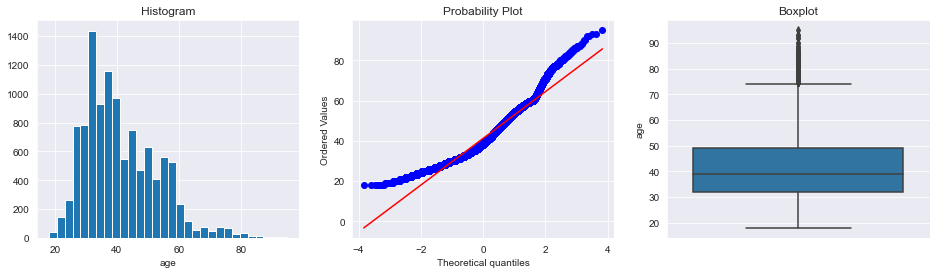

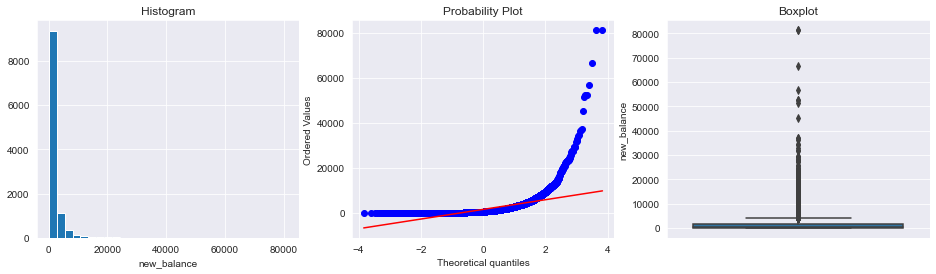

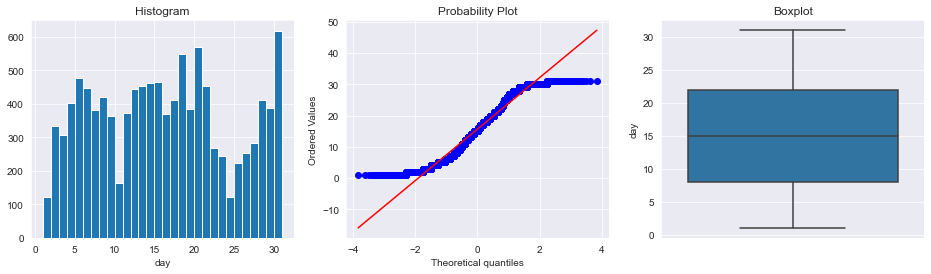

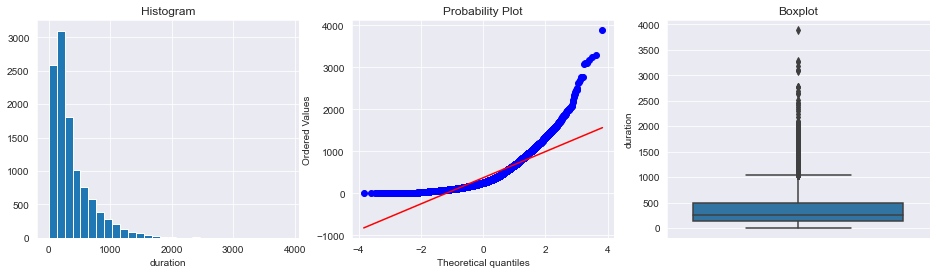

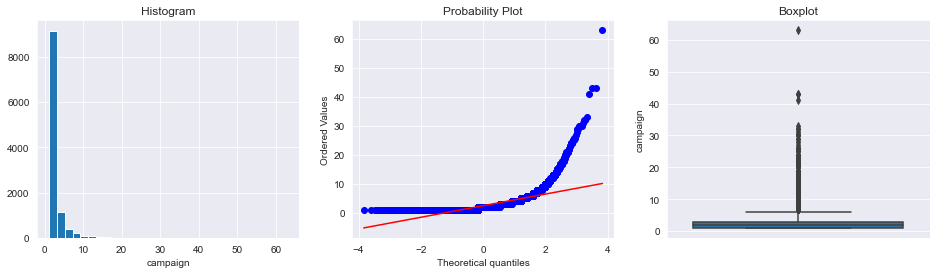

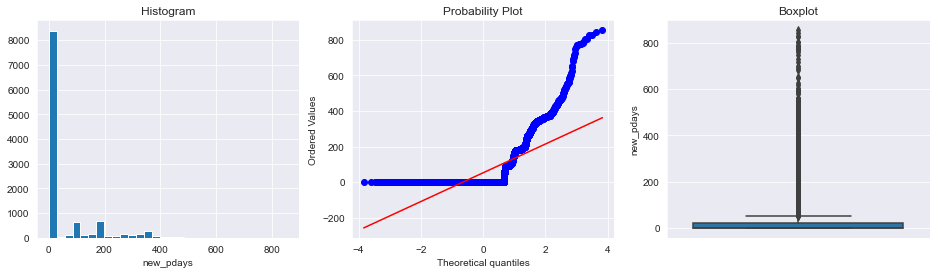

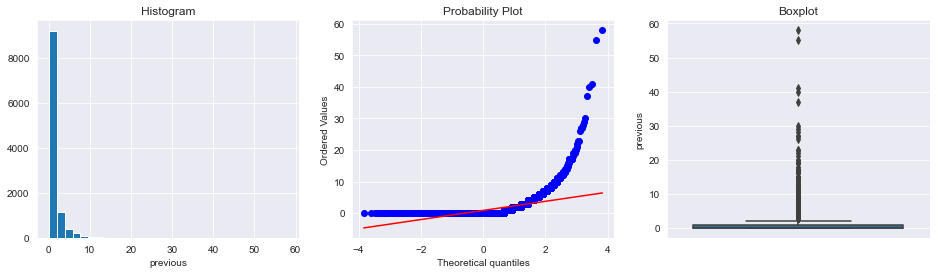

In [17]:
for column in number_handled_outliers:
    plot_nums(df, column)

In [18]:
cat_columns = df[['job', 'marital', 'education', 'default', 'housing' ,'loan', 'contact', 'month', 'poutcome', 'deposit']]
df_new = pd.concat([cat_columns, number_handled_outliers], axis=1)
df_new.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,new_balance,day,duration,campaign,new_pdays,previous
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes,59,2343.0,5.0,1033.0,1.0,0.0,0.0
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes,56,45.0,5.0,1033.0,1.0,0.0,0.0
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes,41,1270.0,5.0,1033.0,1.0,0.0,0.0
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes,55,2476.0,5.0,579.0,1.0,0.0,0.0
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes,54,184.0,5.0,673.0,2.0,0.0,0.0


4.4 Plotting the Deposit Distribution
- There 5,873 campaigns that's successful and 5,289 non-successful in this dataset.

deposit
no     5873
yes    5289
dtype: int64

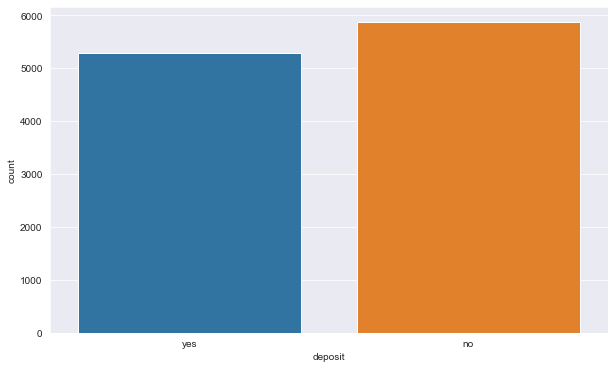

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df_new, x='deposit')

df.value_counts('deposit')

4.5 Plotting the Deposit Distribution & Marital Status
- From below plot we could know that, the value of married people in this dataset are the highest, followed by single, and divorcoed people are the least in quantity.
- It seems that there are no significant differences between marital status and how successfull the campaigns are. However, we can not be so sure if our standard is just the plot. We need to conduct statistic test.

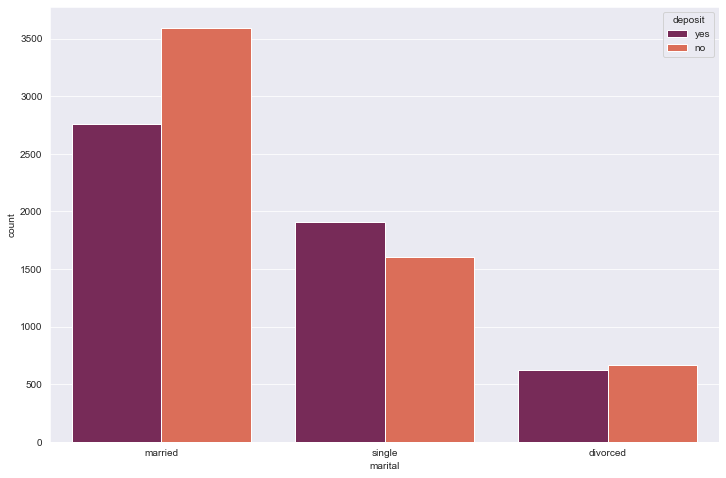

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_new, x='marital', hue='deposit', palette='rocket')
plt.show()

4.6 Conducting Statistical Test: Marital Status & Successul Campaign
- Since those two columns are categorical ones, the statistical test we can use is Chi Square Test.
- First, I separate the respective values based on deposit using crosstab. Later I count the p value using stats from scipy. 
- Here we set the CI (Confidence Interval) to 95% and so the Critical Value to 5%, since based on plot it shows that there is no correlation between marital status and how success the campaigns are.
- In statistical notation we can denote as follow :
- H0 : The Marital Status have no correlation with Deposit (How successful the campaigns are). HA : The Marital Status have correlation with Deposit (How successful the campaigns are).
- After the calculation we got that the P-Value is below Cricial Value which means we can reject the H0.
- How successful the campaigns have correlation with the customer marital status.

In [21]:
contingency_table=pd.crosstab(df_new["marital"],df_new["deposit"])
contingency_table

deposit,no,yes
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


In [22]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p-value =%.29f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p-value =0.00000000000000000000000160058
Probably dependent


4.7 Loan Data Distribution
- From below plot we could comprehend that the customer with background as blue collar have the most loan.
- From the marital status background, we know that the married customers have the most loan compared to the single and divorced ones.

- The most 3 Loan based on Jobs
            job loan  counts
3   blue-collar  yes     337
9    management  yes     260
19   technician  yes     248
- The most 3 Loan based on Marital Status
    marital loan  counts
3   married  yes     913
5    single  yes     346
1  divorced  yes     201


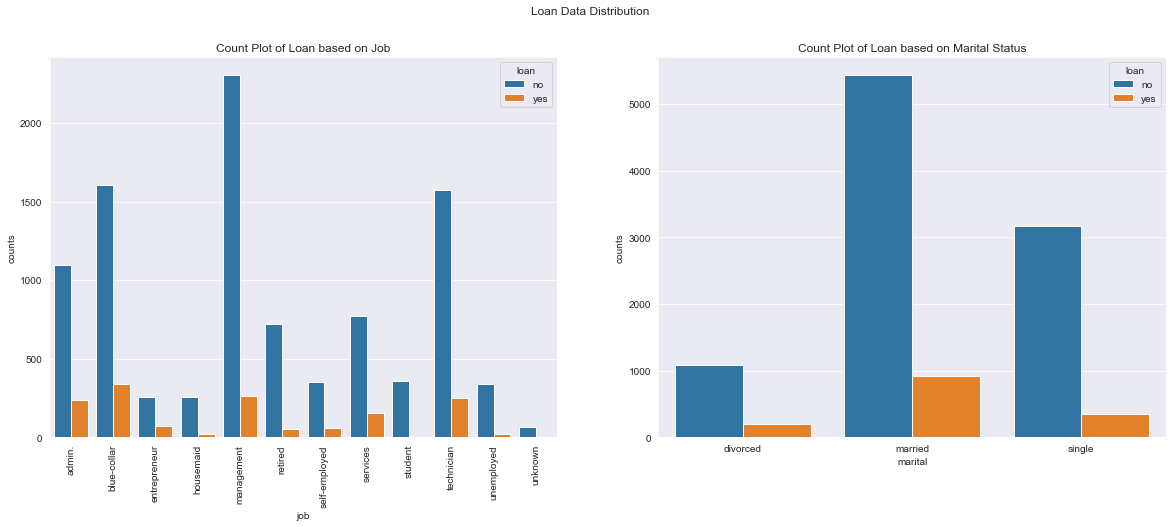

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20, 7))

df_group_by_job_loan = df_new.groupby(by=['job', 'loan']).size().reset_index(name="counts")
df_group_by_marital_loan = df_new.groupby(by=['marital', 'loan']).size().reset_index(name="counts")

sns.barplot(data=df_group_by_job_loan, x='job', y='counts', hue='loan', ax=ax[0])
sns.barplot(data=df_group_by_marital_loan, x='marital', y='counts', hue='loan', ax=ax[1])

plt.suptitle('Loan Data Distribution')
ax[0].set_title('Count Plot of Loan based on Job')
ax[1].set_title('Count Plot of Loan based on Marital Status')
ax[0].tick_params(axis='x', labelrotation = 90)

print('- The most 3 Loan based on Jobs')
print(df_group_by_job_loan.sort_values(['loan', 'counts'], ascending=[False, False]).head(3))
print('='*40)
print('- The most 3 Loan based on Marital Status')
print(df_group_by_marital_loan.sort_values(['loan', 'counts'], ascending=[False, False]).head(3))

4.8 Statistical Test; Are Blue-Collar Workers are the least likely to be given loan?
- To solve this statistical question, we need some values, namely number of yes loan from blue-collar, number of no loan from blue-collar, total yes loan, total no loan.
- After that, we conduct the statistical test using proportion test with parameter 'larger' since we need to see whether blue-collar is the least given loan compared to other type of workers.
- Thus we denote it statistically as : H0 = Blue Collar is the least likely to be given loan. HA = Blue Collar is not the least likely to be given loan.
- After the calculation we got p-value above the Confidence Interval, thus reject the H0. Which mean blue collar is not the least likely to be given loan.

In [24]:
df_group_by_job_loan.sort_values(['loan', 'counts'], ascending=[False, False])

,job,loan,counts
3,blue-collar,yes,337
9,management,yes,260
19,technician,yes,248
1,admin.,yes,236
15,services,yes,154
5,entrepreneur,yes,70
13,self-employed,yes,56
11,retired,yes,55
21,unemployed,yes,21
7,housemaid,yes,20


In [25]:
blue_collar_yes_loan = np.array(337)
blue_collar_no_loan = np.array(1607)

jobs_total_yes_loan = np.array(1460)
jobs_total_no_loan = np.array(9702)

blue_collar_loan = np.array([blue_collar_yes_loan, jobs_total_yes_loan-blue_collar_yes_loan])
total_rows = np.array([blue_collar_yes_loan+blue_collar_no_loan, jobs_total_no_loan+jobs_total_yes_loan-blue_collar_yes_loan-blue_collar_no_loan])

z_score, p_value = proportions_ztest(count=blue_collar_loan, nobs=total_rows, alternative='larger')
print('P-value :', p_value)
if p_value < 0.5:
    print('Rejecting the H0. Blue-collar are not the least likely to be given a loan.')
else :
    print('Fail to reject H0. Blue-collar are the least likely to be given a loan.')

P-value : 4.5908997755209777e-10
Rejecting the H0. Blue-collar are not the least likely to be given a loan.


_____

## 5. MACHINE LEARNING AS FURTHER ANALYSIS

5.1 Explanation
- In this session 5, I will use machine learning, especially Random Forest to explore which features that have impact on deposit as the target.
- Since this session we use Machine Learning as Depcriptive Analysis, not Prescriptive nor Predictive Analysis I will exclude some treatment that usually we do in modelling machine learning model, like : splitting data, setting hyper-parameter, etc.

In [26]:
df_new.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,new_balance,day,duration,campaign,new_pdays,previous
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes,59,2343.0,5.0,1033.0,1.0,0.0,0.0
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes,56,45.0,5.0,1033.0,1.0,0.0,0.0
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes,41,1270.0,5.0,1033.0,1.0,0.0,0.0
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes,55,2476.0,5.0,579.0,1.0,0.0,0.0
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes,54,184.0,5.0,673.0,2.0,0.0,0.0


5.2 Dividing Columns
- Here we divide between numerical columns, nominal and ordinal columns.
- Later we do preprocessing before we fit the respective features to the model 

In [27]:
nominal_columns = df_new[['job', 'marital', 'contact', 'month', 'contact']]
ordinal_columns = df_new[['education', 'default', 'housing', 'loan', 'poutcome']]

y_train = df_new['deposit']

5.3 Preprocessing for feature variables
- Here we conduct several preprocessings based in the type of the data

In [28]:
ordinal_columns.default.replace({'no':0, 'yes':1}, inplace=True)
ordinal_columns.education.replace({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}, inplace=True)
ordinal_columns.housing.replace({'no':0, 'yes':1}, inplace=True)
ordinal_columns.loan.replace({'no':0, 'yes':1}, inplace=True)
ordinal_columns.poutcome.replace({'unknown':0, 'failure':0, 'other':1, 'success':2}, inplace=True)

- Nominal category columns are encoded by one-hot encoded

In [29]:
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(nominal_columns)

one_hot_columns = onehot_encoder.transform(nominal_columns).toarray()
df_one_hot_columns = pd.DataFrame(one_hot_columns)
df_one_hot_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


- The numerical columns are scaled with MinMaxScaler instead of StandardScaler since the dataset is skew.
- Some sources and based on my experiences MiaxMaxScaler works better with skew dataset.

In [30]:
scaler = MinMaxScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(num_columns))
scaled_num.columns = numerical_columns
scaled_num.head()

,age,new_balance,day,duration,campaign,new_pdays,previous
0,0.532468,0.028853,0.133333,0.268110,0.000000,0.0,0.0
1,0.493506,0.000554,0.133333,0.377675,0.000000,0.0,0.0
2,0.298701,0.015640,0.133333,0.357566,0.000000,0.0,0.0
3,0.480519,0.030491,0.133333,0.148750,0.000000,0.0,0.0
4,0.467532,0.002266,0.133333,0.172983,0.016129,0.0,0.0


- Concatting the final features

In [31]:
X_train = pd.concat([scaled_num, ordinal_columns, df_one_hot_columns], axis=1)
X_train.head()

,age,new_balance,day,duration,campaign,new_pdays,previous,education,default,housing,...,23,24,25,26,27,28,29,30,31,32
0,0.532468,0.028853,0.133333,0.268110,0.000000,0.0,0.0,2,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.493506,0.000554,0.133333,0.377675,0.000000,0.0,0.0,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.298701,0.015640,0.133333,0.357566,0.000000,0.0,0.0,2,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,0.030491,0.133333,0.148750,0.000000,0.0,0.0,2,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.467532,0.002266,0.133333,0.172983,0.016129,0.0,0.0,3,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


5.4 Model Define & Model Fitting
- Here we define the model and fit the features data to the model.
- I can see which features affect the deposit with feature importances from Random FOrest.

In [32]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

- Counting the number if features that most affect the target variables.
- Here we can see there are 9 features that most affect the deposit.

In [33]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

- Here we could see those 9 features that most affect the deposit as follow.

In [34]:
print(selected_feat)

Index(['age', 'new_balance', 'day', 'duration', 'campaign', 'new_pdays',
       'previous', 'housing', 'poutcome'],
      dtype='object')


___________

## 6. MODEL IMPROVEMENT AS FURTHER ANALYSIS

6.1 Explanation of Improvement
- There are some ways to do improvement namely, setting the hyper-parameter of the model, changing the model or changing how we handle the features.
- In this session I'll chosee the last one; changing how we handle the features. Previously, we treat the nominal data with encoding them using ont-hot encoder. Now I will encoded them with Ordinal Encoder to see whether thre is any difference between treats.

In [35]:
ordinal_encoder = OrdinalEncoder()
nominal_df = pd.DataFrame(ordinal_encoder.fit_transform(nominal_columns))
nominal_df.head()

,0,1,2,3,4
0,0.0,1.0,2.0,8.0,2.0
1,0.0,1.0,2.0,8.0,2.0
2,9.0,1.0,2.0,8.0,2.0
3,7.0,1.0,2.0,8.0,2.0
4,0.0,1.0,2.0,8.0,2.0


- Assing the original names to respective columns.

In [36]:
nominal_df.columns = nominal_columns.columns.values
nominal_df.head()

,job,marital,contact,month,contact
0,0.0,1.0,2.0,8.0,2.0
1,0.0,1.0,2.0,8.0,2.0
2,9.0,1.0,2.0,8.0,2.0
3,7.0,1.0,2.0,8.0,2.0
4,0.0,1.0,2.0,8.0,2.0


- Finalizing the features

In [37]:
X_tr = pd.concat([scaled_num, ordinal_columns, nominal_df], axis=1)
X_tr.head()

,age,new_balance,day,duration,campaign,new_pdays,previous,education,default,housing,loan,poutcome,job,marital,contact,month,contact
0,0.532468,0.028853,0.133333,0.268110,0.000000,0.0,0.0,2,0,1,0,0,0.0,1.0,2.0,8.0,2.0
1,0.493506,0.000554,0.133333,0.377675,0.000000,0.0,0.0,2,0,0,0,0,0.0,1.0,2.0,8.0,2.0
2,0.298701,0.015640,0.133333,0.357566,0.000000,0.0,0.0,2,0,1,0,0,9.0,1.0,2.0,8.0,2.0
3,0.480519,0.030491,0.133333,0.148750,0.000000,0.0,0.0,2,0,1,0,0,7.0,1.0,2.0,8.0,2.0
4,0.467532,0.002266,0.133333,0.172983,0.016129,0.0,0.0,3,0,0,0,0,0.0,1.0,2.0,8.0,2.0


6.2 Model Define & Fitting
- Here we define and fitting the model with improvement features data.
- Now we got that there are 5 features that give the most impact on deposit.

In [38]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_tr, y_train)

selected_feat= X_tr.columns[(sel.get_support())]
len(selected_feat)

5

6.3 Seeing the essential features
- All the essential variables almost the same with base model we did previously.
- The difference is in 'month' column only.
- We could add it with previous essential features as well, so we have 10 features that essentially affect the deposit and how successful the campaigns are.
- Those features that affect the campaigns the most are 'age', 'new_balance', 'day', 'duration', 'month', 'campaign', 'new_pdays', 'previous', 'housing', 'poutcome'.

In [39]:
print(selected_feat)

Index(['age', 'new_balance', 'day', 'duration', 'month'], dtype='object')


____

## 7. Conclusion

**7.1 Part I : Exploratory Data Analysis**

a. How can you handle null values and outliers from the data? Please wrangle/handle them
- There is null values in the dataset.
- There are outliers in the dataset, we can handle it with Tukey's Rule for Outliers since the data is skew. With this rule, we replace all the outliers (both lower & upper) with the mean or with either below Q1 − 1.5IQR, or above Q3 + 1.5IQR. (Refrence : sssion 4.3)

b. Are there any variables that warrant transformations?
- If it's for visualization we don't need to transform the variables. But, should we use the features for building machine learning, we need to transfor the variables and reat them as their type of data. Example, scaling the numeric variables, encoding the categorical variables. (Reference : Session 4 & 5)


c. Do you notice any patterns or anomalies in the data? Can you plot them?
- There are many outliers in this dataset. This reason maybe because this dataset are a specific & segmented (banking campaign) dataset, that not represent the actual of the population. (Reference : Session 4.2 & 4.3)

**7.2 Part 2: Analysis using statistical method**

You work across different departments, and your coworkers are from different backgrounds.
Please run any statistical tests to answer these questions & propose data-driven action
recommendations to your CEO. Please explain your results with non-statistical things so your
CEO can understand your findings.

a. Is there a significant relationship between marital status and success of a campaign?
- Yes, there is significant relationship/corelation between marital status and the success of a campaign. The married customers have the more loan compared to other customers. However, we need to keep in mind that correlation doesn't imply causation. It doesn't mean that marrying makes people tend to have a loan, it's just the loan and marrital status have corelation and may there be a other factors affect the decision of married people to have a loan. (Reference : session 4.4 & 4.5)


b. Your supervisor insists that people who have job as blue-collar are least likely to be given a loan. Justify or refute this statement using an appropriate statistical test?
- There some ways to interpreting this question, thus the ways of answering also differ. Here I interpret it as 'Are blue-collar the type of customers that the least likely to be given a loan compared to other type of customer?'
- Answering to the question, No. The blue-collar are not the least customer to be given loan. The stereo-type may say that, but after the calculation made it shows that the blue-collars are not the least. It may because blue-collar are one type of productive customers.(Reference : session 4.6)



**7.3 Part 03: Data Visualization**

Please plot and visualize the answers to the below questions.
a. Which job has the most loan?
- Blue Collar (Reference : session 4.5)

b. Which marital status has the most loan?
- Blue Collar (Reference : session 4.5)